<a href="https://colab.research.google.com/github/mkjubran/ENEE3309-2-2022/blob/main/FilterAudioSignal_SpecificBandwidth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf ./ENEE3309-2-2022
!git clone https://github.com/mkjubran/ENEE3309-2-2022.git

Cloning into 'ENEE3309-2-2022'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 8), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


Filter an audio signal based on Percentage Power Bandwidth (PowerBW). The filtered audio signal will contain $PowerBD$ power of the power of the original audio signal.

In [3]:
fcenIndex

441000

In [4]:
RangeIndex

461000

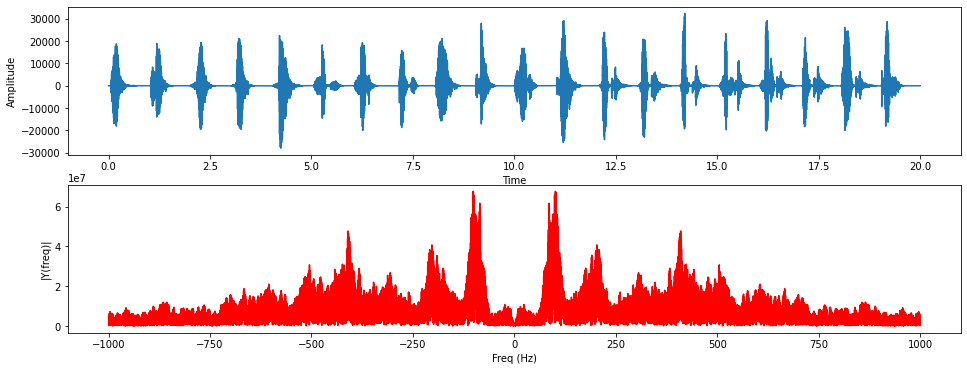

Enter BW :400


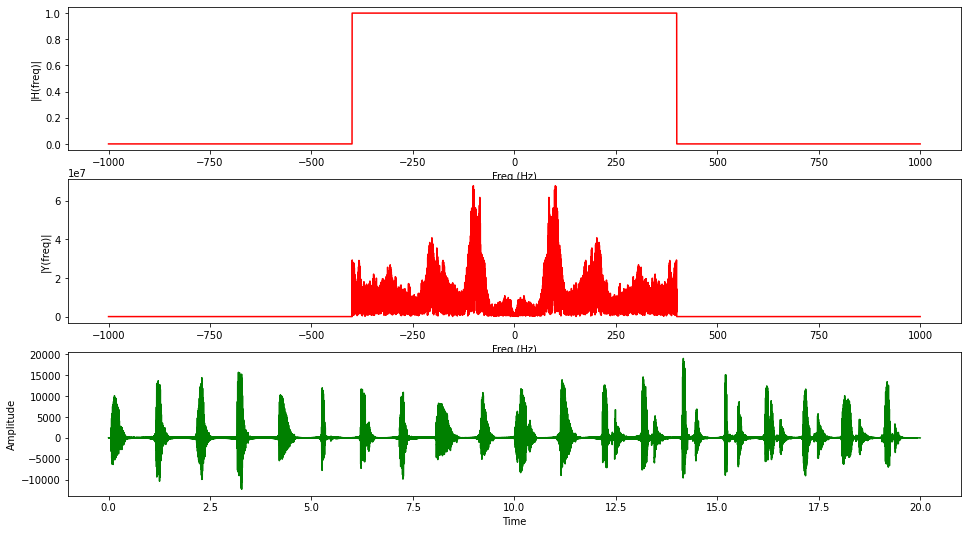



============ Summary ======
Duration = 20.0 sec
Energy of wave (time domain) = 4953106228.839 KJouls
Power of wave (time domain) = 63.67078816127593 Watts
Energy of wave (DS frequency domain) = 4953106228.839015 KJouls
Power of wave (DS frequency domain) = 63.670824255827235 Watts
Bandiwdth of filtered wave = 0.4 KHz
Energy of the filtered wave (time domain) = 2767961869.8936434 KJouls
Power of the filtered wave (time domain) = 35.58137171182726 Watts
Energy of the filtered wave (DS frequency domain) = 2767961869.8936496 KJouls
Power of the filtered wave (DS frequency domain) = 35.58139188267298 Watts
Energy Ratio (filtered / original) = 55.88335363730831%


In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import random 
import scipy 
import wave 
import struct 
import pylab
import pdb
from scipy.io import wavfile

################################################
filenameWave='/content/ENEE3309-2-2022/counting.wav'
filenameWavefiltered='./Filtered.wav'
filenameWavewithoutfilter='./Withoutfilter.wav'

BWrange=1000
write=1
read=1
################################################

rate, data = wavfile.read(filenameWave)
#pdb.set_trace()
if len(data.shape) > 1:
   data=data[:,0]

filtereddata = np.fft.rfft(data, axis=0)

filteredwrite = np.fft.irfft(filtereddata, axis=0)
##############################################
## Generate Signal and add save it to text file
Fs=rate;
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,len(data)*Ts,Ts) # time vector

y=[float(x) for x in data]
## Write values to a file
#Open new data file
if write!=0:
   f = open("Signal_in_text.txt", "w")
   for i in range(len(y)):
       f.write( str(y[i]) + " " + str(float(t[i])) + "\n"  )
   f.close()


## Read values from a file
if read !=0:
   with open('Signal_in_text.txt') as f:
      w=f.read()
   y=[];
   t=[];
   for x in w.split('\n'):
      if x != '':
         y.append(float(x.split()[0]))
         t.append(float(x.split()[1]))


n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
fcen=frq[int(len(frq)/2)]
frq_DS=frq-fcen
frq_SS = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y) # fft computing and normalization
yinv= np.fft.ifft(Y).real # ifft computing and normalization
Y_DS=np.roll(Y,int(n/2))
Y_SS = Y[range(int(n/2))]

fcenIndex = (np.abs(frq_DS)).argmin()
RangeIndex = (np.abs(frq_DS-BWrange)).argmin() - fcenIndex

RangeIndexMin = fcenIndex-RangeIndex
if RangeIndexMin < 0:
  RangeIndexMin = 0

RangeIndexMax = fcenIndex+RangeIndex
if RangeIndexMax > len(frq_DS)-1:
  RangeIndexMax = len(frq_DS)-1

fig, ax = plt.subplots(2, 1,  figsize=(16, 6))
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax],abs(Y_DS[RangeIndexMin:RangeIndexMax]),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.show()

y=np.array(y)
y_int=y.astype(np.int16)

yinv=np.array(yinv)
yinv_int=yinv.astype(np.int16)
wavfile.write(filenameWavewithoutfilter, rate, y_int)

B = int(input ("Enter BW :"))

fBWIndex = (np.abs(frq_DS - B)).argmin()
B = frq_DS[fBWIndex]

Mask_DS=np.ones(len(frq_DS))
Yf_DS=np.copy(Y_DS)
Bmax=frq_DS[len(frq_DS)-1]
Bmin=0
Bold=0

Yf_DS=np.copy(Y_DS)
for cnt in range(len(frq_DS)):
  if ~(((frq_DS[cnt])>-1*B) and ((frq_DS[cnt])<B)):
    Mask_DS[cnt]=0;
    #print(B,frq_DS[cnt],Yf_DS[cnt])
    Yf_DS[cnt]=Y_DS[cnt]*0;


Yf=np.roll(Yf_DS,int(n/2))
yinv= np.fft.ifft(Yf).real # ifft computing and normalization
yinv=np.array(yinv)
yinv_int=yinv.astype(np.int16)

wavfile.write(filenameWavefiltered, rate, yinv_int)

fig, ax = plt.subplots(3, 1,  figsize=(16, 9))
ax[0].plot(frq_DS[RangeIndexMin:RangeIndexMax],abs(Mask_DS[RangeIndexMin:RangeIndexMax]),'r') # plotting the spectrum
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|H(freq)|')
ax[1].plot(frq_DS[RangeIndexMin:RangeIndexMax],abs(Yf_DS[RangeIndexMin:RangeIndexMax]),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[2].plot(t,yinv,'g') # plotting the spectrum
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')

plt.show()

Energy_time=np.sum(data.astype(float)**2)
Power_time=1.0/(2*(data.size)+1)*np.sum(data.astype(float)**2)/rate
Energy_freq_DS=np.real(sum(Y_DS*np.conj(Y_DS)))/n
Power_freq_DS=np.real(sum(Y_DS*np.conj(Y_DS)))/(2*(n**2)/(Ts))
Energy_time_filtered=np.sum(yinv.astype(float)**2)
Power_time_filtered=1.0/(2*(yinv.size)+1)*np.sum(yinv.astype(float)**2)/rate
Energy_freq_DS_filtered=np.real(sum(Yf_DS*np.conj(Yf_DS)))/n
Power_freq_DS_filtered=np.real(sum(Yf_DS*np.conj(Yf_DS)))/(2*(n**2)/(Ts))

print('\n\n============ Summary ======'.format(B))
print('Duration = {} sec'.format(len(y)*Ts))
print('Energy of wave (time domain) = {} KJouls'.format(Energy_time/1000))
print('Power of wave (time domain) = {} Watts'.format(Power_time))
print('Energy of wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS/1000))
print('Power of wave (DS frequency domain) = {} Watts'.format(Power_freq_DS))
print('Bandiwdth of filtered wave = {} KHz'.format(float(B)/1000))
print('Energy of the filtered wave (time domain) = {} KJouls'.format(Energy_time_filtered/1000))
print('Power of the filtered wave (time domain) = {} Watts'.format(Power_time_filtered))
print('Energy of the filtered wave (DS frequency domain) = {} KJouls'.format(Energy_freq_DS_filtered/1000))
print('Power of the filtered wave (DS frequency domain) = {} Watts'.format(Power_freq_DS_filtered))
print('Energy Ratio (filtered / original) = {}%'.format(((Energy_time_filtered/Energy_time))*100))




Play the Original Audio Signal

In [6]:
from IPython.display import Audio
# Generate a player for mono sound
Audio(data,rate=rate)

Play the filtered Audio Signal

In [7]:
from IPython.display import Audio
# Generate a player for mono sound
Audio(yinv,rate=rate)